# CIFAR Image Classification Using CNN


In [239]:
# Load packages.

import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Keras functions and get the CIFAR-10 data

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, LeakyReLU
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import EarlyStopping


from IPython.core.display import display, HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

#set seed
np.random.seed(2019)

In [240]:
# Load the data set
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [241]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [242]:
# Checking the categories and frequencies
categories, count = np.unique(np.array(y_train), return_counts=True)
print(np.stack([categories, count]).T)

[[   0 5000]
 [   1 5000]
 [   2 5000]
 [   3 5000]
 [   4 5000]
 [   5 5000]
 [   6 5000]
 [   7 5000]
 [   8 5000]
 [   9 5000]]


## Preprocess the data to turn it into a binary classification problem.
### Filter training and test sets to 2 categories (deer and dog)

In [243]:
# labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Choosing dogs and deers to compare to (4 & 5 in labels)
digit0 = 4
digit1 = 5

train_ind = np.where((y_train == digit0) | (y_train == digit1))[0]
test_ind = np.where((y_test == digit0) | (y_test == digit1))[0]

y_train = y_train[train_ind]
X_train = X_train[train_ind]

y_test = y_test[test_ind]
X_test = X_test[test_ind]

# Creating a validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, stratify=y_train, random_state=2019)

# Standardizing the pixels for faster training
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)


In [244]:
# Getting the frequencies of categories in my train, valid and test
train, cnt = np.unique(np.array(y_train), return_counts=True)
valid, ct = np.unique(np.array(y_valid), return_counts=True)
test, c = np.unique(np.array(y_test), return_counts=True)
print(np.stack([train, cnt]).T)
print(np.stack([valid, ct]).T)
print(np.stack([test, c]).T)

[[   4 4000]
 [   5 4000]]
[[   4 1000]
 [   5 1000]]
[[   4 1000]
 [   5 1000]]


In [184]:
# Checking the final shapes of the matrix sets
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(8000, 32, 32, 3)
(2000, 32, 32, 3)
(2000, 32, 32, 3)
(8000, 1)
(2000, 1)
(2000, 1)


In [245]:
# Relabel digit0 as 0 and digit 1 as 1 for binary classification
y_train[y_train == digit0] = 0
y_train[y_train == digit1] = 1
y_valid[y_valid == digit0] = 0
y_valid[y_valid == digit1] = 1
y_test[y_test == digit0] = 0
y_test[y_test == digit1] = 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


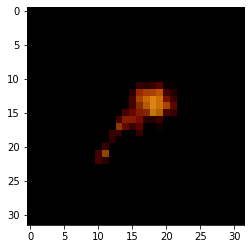

In [139]:
# Plot an example image (deer). 
plt.imshow(X_train[4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


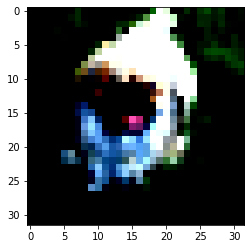

In [140]:
# Plot an example image (dog). 
plt.imshow(X_train[2])

## Exploratory Data Analysis:

In [143]:
#Convert to greyscale
matrix=np.empty([(1024*len(X_train)),1])
i=0
for row in X_train:
    row=row.reshape(1024,3)
    for image in row:
        matrix[i]=((.2989*image[0])+(.5870*image[1])+(.1140*image[2]))
        i=i+1

In [144]:
# Convert into matrix with one row per picture and 1024 greyscale pixels as columns
smallimage=matrix.reshape(len(X_train),1024)


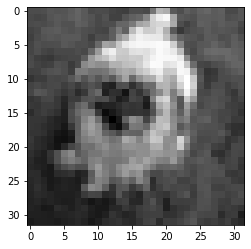

In [287]:
im2=smallimage[2].reshape(32,32)
plt.gray()
plt.imshow(im2)

In [146]:
# Calculate standard deviation of each pixel
smallimageSTD = smallimage.std(axis=0)

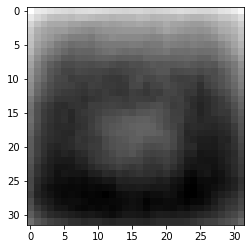

In [147]:
# Display the standard deviations of each pixel as a picture
im3=smallimageSTD.reshape(32,32)
plt.gray()
plt.imshow(im3)

In [148]:
# Give the max and min for some context
print('maximum standard deviation is',np.max(im3),'at position',np.where(im3==np.amax(im3)))
print('minimum standard deviation is',np.min(im3),'at position',np.where(im3==np.amin(im3)))

maximum standard deviation is 1.0984994137676174 at position (array([0], dtype=int64), array([0], dtype=int64))
minimum standard deviation is 0.8770985195169342 at position (array([27], dtype=int64), array([24], dtype=int64))


In [149]:
#Now deer and dog separately
#Create testing and training data sets so I can get dog and deer separate
(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()
#Preprocess the data to turn it into a binary classification problem.
# Filter training and test sets to 2 digits
digit0 = 4
digit1 = 5
train_ind1 = np.where(y_train0 == digit0)[0]
train_ind2 = np.where(y_train0 == digit1)[0]
#Create one training x set for deer and one for dog
X_train1 = X_train0[train_ind1]
X_train2 = X_train0[train_ind2]

In [151]:
# Convert to greyscale
matrix1=np.empty([(1024*len(X_train1)),1])
i=0
for row in X_train1: 
    row=row.reshape(1024,3) 
    for image in row:
        matrix1[i]=((.2989*image[0])+(.5870*image[1])+(.1140*image[2]))
        i=i+1

In [152]:
# Convert to greyscale
matrix2=np.empty([(1024*len(X_train2)),1])
i=0
for row in X_train2:
    row=row.reshape(1024,3)
    for image in row:
        matrix2[i]=((.2989*image[0])+(.5870*image[1])+(.1140*image[2]))
        i=i+1

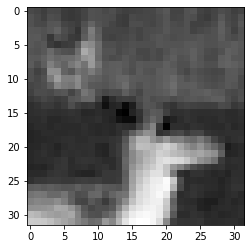

In [153]:
# Convert into matrix with one row per picture and 1024 greyscale pixels as columns
smallimage1=matrix1.reshape(len(X_train1),1024)
im4=smallimage1[76].reshape(32,32)
plt.gray()
plt.imshow(im4)

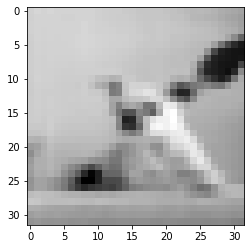

In [154]:
# Convert into matrix with one row per picture and 1024 greyscale pixels as columns
smallimage2=matrix2.reshape(len(X_train2),1024)
im5=smallimage2[76].reshape(32,32)
plt.gray()
plt.imshow(im5)

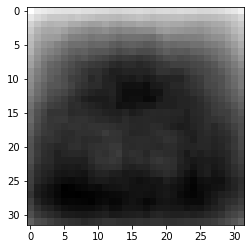

In [155]:
# Calculate standard deviation of each pixel for deer
smallimageSTDdeer = smallimage1.std(axis=0)
# Display the standard deviations of each deer pixel as a picture
im6=smallimageSTDdeer.reshape(32,32)
plt.gray()
plt.imshow(im6)

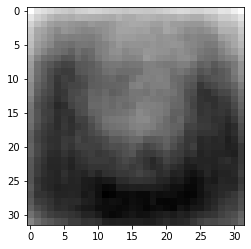

In [156]:
# Calculate standard deviation of each pixel for dogs
smallimageSTDdog = smallimage2.std(axis=0)
# Display the standard deviations of each dog pixel as a picture
im7=smallimageSTDdog.reshape(32,32)
plt.gray()
plt.imshow(im7)

In [157]:
# Give the max and min for some context
print('maximum deer standard deviation is',np.max(im6),'at position',np.where(im6==np.amax(im6)))
print('minimum deer standard deviation is',np.min(im6),'at position',np.where(im6==np.amin(im6)))

maximum deer standard deviation is 63.18038085898833 at position (array([0], dtype=int64), array([0], dtype=int64))
minimum deer standard deviation is 46.83147011863482 at position (array([27], dtype=int64), array([7], dtype=int64))


In [158]:
# Give the max and min for some context
print('maximum dog standard deviation is',np.max(im7),'at position',np.where(im7==np.amax(im7)))
print('minimum dog standard deviation is',np.min(im7),'at position',np.where(im7==np.amin(im7)))

maximum dog standard deviation is 67.91329548008135 at position (array([0], dtype=int64), array([0], dtype=int64))
minimum dog standard deviation is 56.81145646768283 at position (array([27], dtype=int64), array([11], dtype=int64))


In [159]:
# Which class has more total standard deviation?
print('Total deer standard deviation:',np.sum(im6))
print('Total dog standard deviation:',np.sum(im7))

Total deer standard deviation: 52593.86420233357
Total dog standard deviation: 62182.46268232062


### As expected, there is more variation in the dog class of images than there is in the deer class of images. The distribution of standard deviation among the pixels is clearly different between the two classes as well.

### Correlation plot analysis. 
This analysis will look at how the pixels related to each other in the image classes. The closer the pixels are to each other, the more related they should be. 

[Text(0.5, 0, '0'),
 Text(13.5, 0, '13'),
 Text(26.5, 0, '26'),
 Text(39.5, 0, '39'),
 Text(52.5, 0, '52'),
 Text(65.5, 0, '65'),
 Text(78.5, 0, '78'),
 Text(91.5, 0, '91'),
 Text(104.5, 0, '104'),
 Text(117.5, 0, '117'),
 Text(130.5, 0, '130'),
 Text(143.5, 0, '143'),
 Text(156.5, 0, '156'),
 Text(169.5, 0, '169'),
 Text(182.5, 0, '182'),
 Text(195.5, 0, '195'),
 Text(208.5, 0, '208'),
 Text(221.5, 0, '221'),
 Text(234.5, 0, '234'),
 Text(247.5, 0, '247'),
 Text(260.5, 0, '260'),
 Text(273.5, 0, '273'),
 Text(286.5, 0, '286'),
 Text(299.5, 0, '299'),
 Text(312.5, 0, '312'),
 Text(325.5, 0, '325'),
 Text(338.5, 0, '338'),
 Text(351.5, 0, '351'),
 Text(364.5, 0, '364'),
 Text(377.5, 0, '377'),
 Text(390.5, 0, '390'),
 Text(403.5, 0, '403'),
 Text(416.5, 0, '416'),
 Text(429.5, 0, '429'),
 Text(442.5, 0, '442'),
 Text(455.5, 0, '455'),
 Text(468.5, 0, '468'),
 Text(481.5, 0, '481'),
 Text(494.5, 0, '494'),
 Text(507.5, 0, '507'),
 Text(520.5, 0, '520'),
 Text(533.5, 0, '533'),
 Text(546.

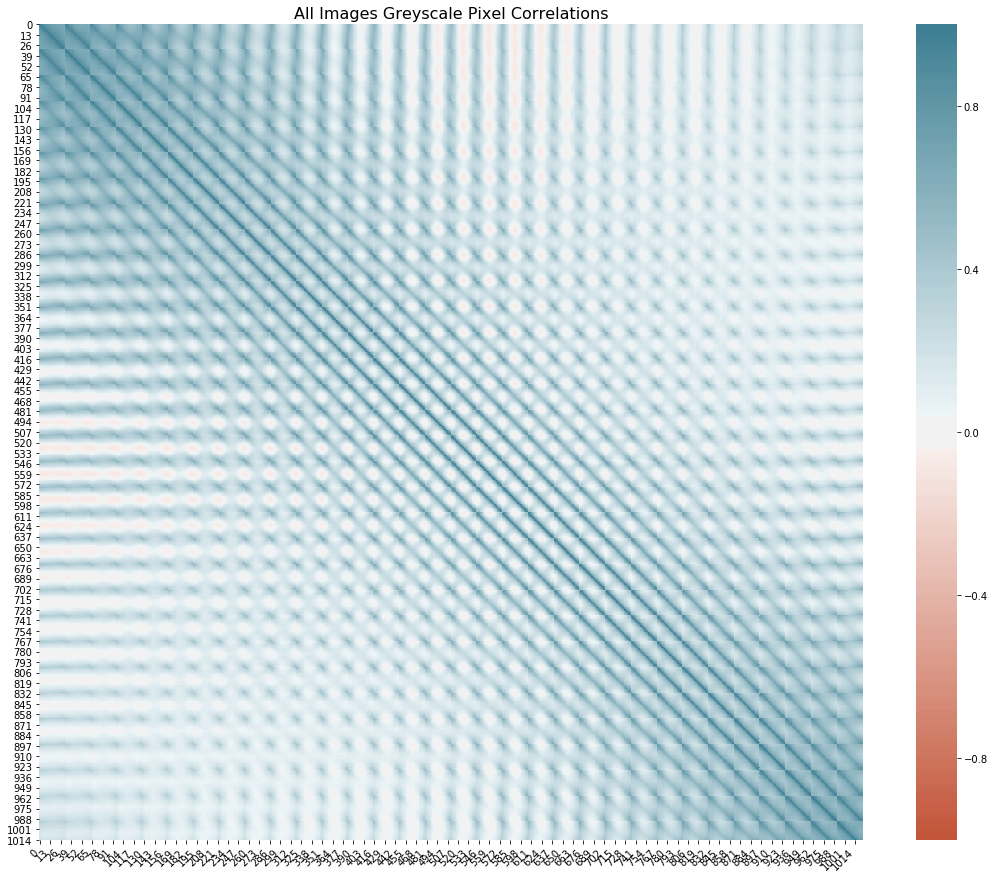

In [30]:
#Convert all images to a data frame
dfX_Train = pd.DataFrame(smallimage)

#Plot the correlations of all creatures, dogs and deer alike
#First get the correlations
corr = dfX_Train.corr()
#Set teh figure size
ax = plt.figure(figsize=(19, 15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title('All Images Greyscale Pixel Correlations',fontsize=16)
#ax.figure(figsize=(19, 15))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, '0'),
 Text(13.5, 0, '13'),
 Text(26.5, 0, '26'),
 Text(39.5, 0, '39'),
 Text(52.5, 0, '52'),
 Text(65.5, 0, '65'),
 Text(78.5, 0, '78'),
 Text(91.5, 0, '91'),
 Text(104.5, 0, '104'),
 Text(117.5, 0, '117'),
 Text(130.5, 0, '130'),
 Text(143.5, 0, '143'),
 Text(156.5, 0, '156'),
 Text(169.5, 0, '169'),
 Text(182.5, 0, '182'),
 Text(195.5, 0, '195'),
 Text(208.5, 0, '208'),
 Text(221.5, 0, '221'),
 Text(234.5, 0, '234'),
 Text(247.5, 0, '247'),
 Text(260.5, 0, '260'),
 Text(273.5, 0, '273'),
 Text(286.5, 0, '286'),
 Text(299.5, 0, '299'),
 Text(312.5, 0, '312'),
 Text(325.5, 0, '325'),
 Text(338.5, 0, '338'),
 Text(351.5, 0, '351'),
 Text(364.5, 0, '364'),
 Text(377.5, 0, '377'),
 Text(390.5, 0, '390'),
 Text(403.5, 0, '403'),
 Text(416.5, 0, '416'),
 Text(429.5, 0, '429'),
 Text(442.5, 0, '442'),
 Text(455.5, 0, '455'),
 Text(468.5, 0, '468'),
 Text(481.5, 0, '481'),
 Text(494.5, 0, '494'),
 Text(507.5, 0, '507'),
 Text(520.5, 0, '520'),
 Text(533.5, 0, '533'),
 Text(546.

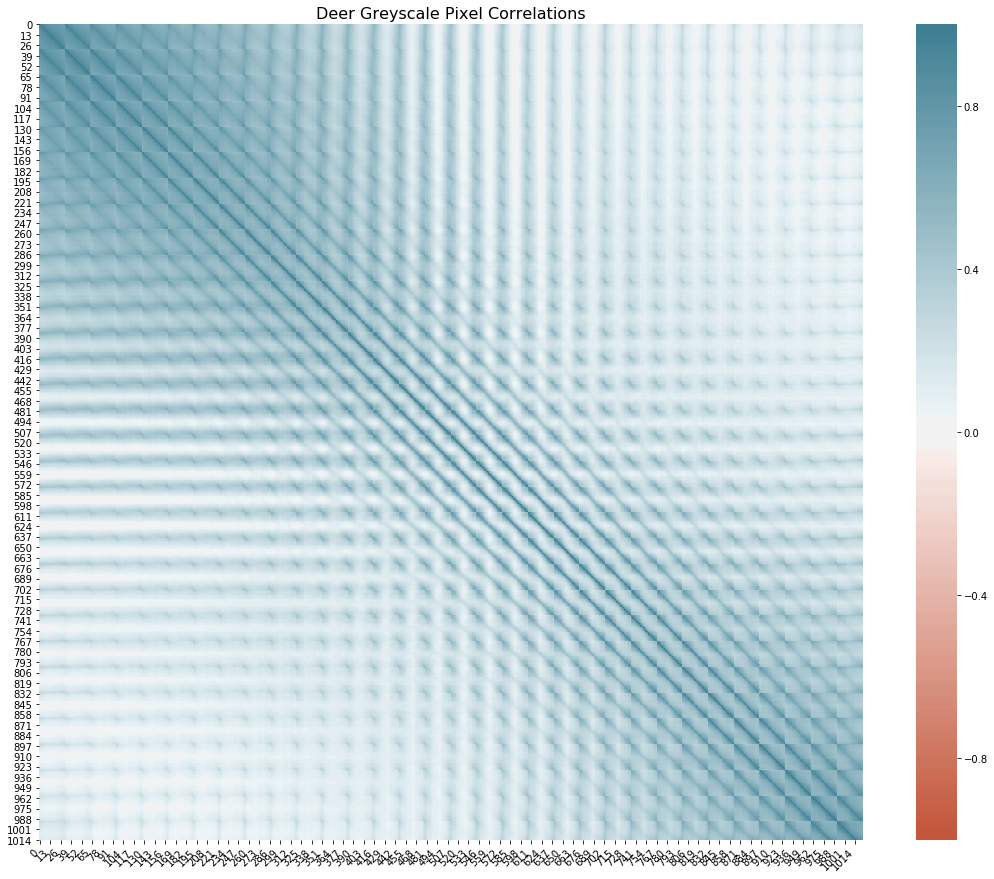

In [31]:
#Convert all deer images to a data frame
dfX_Train1 = pd.DataFrame(smallimage1)

#Plot the correlations of all creatures, dogs and deer alike
#First get the correlations
corr = dfX_Train1.corr()
#Set teh figure size
ax = plt.figure(figsize=(19, 15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title('Deer Greyscale Pixel Correlations',fontsize=16)
#ax.figure(figsize=(19, 15))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, '0'),
 Text(13.5, 0, '13'),
 Text(26.5, 0, '26'),
 Text(39.5, 0, '39'),
 Text(52.5, 0, '52'),
 Text(65.5, 0, '65'),
 Text(78.5, 0, '78'),
 Text(91.5, 0, '91'),
 Text(104.5, 0, '104'),
 Text(117.5, 0, '117'),
 Text(130.5, 0, '130'),
 Text(143.5, 0, '143'),
 Text(156.5, 0, '156'),
 Text(169.5, 0, '169'),
 Text(182.5, 0, '182'),
 Text(195.5, 0, '195'),
 Text(208.5, 0, '208'),
 Text(221.5, 0, '221'),
 Text(234.5, 0, '234'),
 Text(247.5, 0, '247'),
 Text(260.5, 0, '260'),
 Text(273.5, 0, '273'),
 Text(286.5, 0, '286'),
 Text(299.5, 0, '299'),
 Text(312.5, 0, '312'),
 Text(325.5, 0, '325'),
 Text(338.5, 0, '338'),
 Text(351.5, 0, '351'),
 Text(364.5, 0, '364'),
 Text(377.5, 0, '377'),
 Text(390.5, 0, '390'),
 Text(403.5, 0, '403'),
 Text(416.5, 0, '416'),
 Text(429.5, 0, '429'),
 Text(442.5, 0, '442'),
 Text(455.5, 0, '455'),
 Text(468.5, 0, '468'),
 Text(481.5, 0, '481'),
 Text(494.5, 0, '494'),
 Text(507.5, 0, '507'),
 Text(520.5, 0, '520'),
 Text(533.5, 0, '533'),
 Text(546.

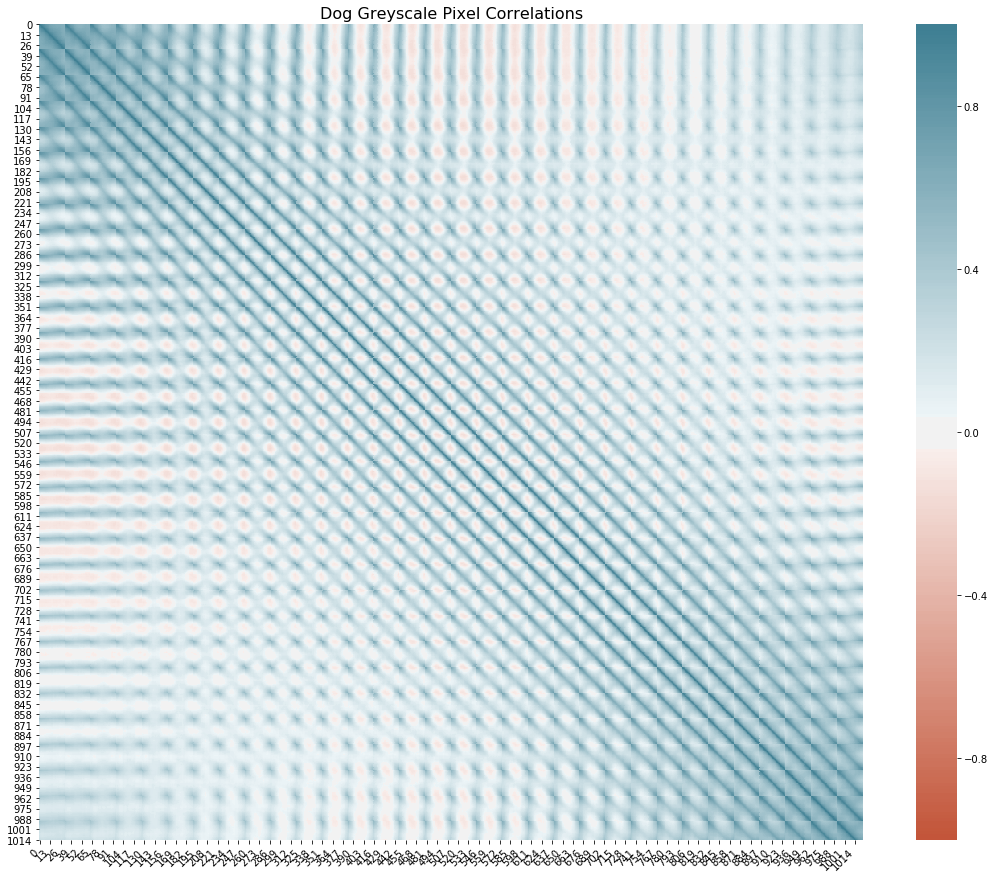

In [32]:
#Convert all dog mages to a data frame
dfX_Train2 = pd.DataFrame(smallimage2)

#Plot the correlations of all creatures, dogs and deer alike
#First get the correlations
corr = dfX_Train2.corr()
#Set teh figure size
ax = plt.figure(figsize=(19, 15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title('Dog Greyscale Pixel Correlations',fontsize=16)
#ax.figure(figsize=(19, 15))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

### It ia observed that there is much less correlation of pixels in the dog class of images than the deer class. This matches expectations because most of the time the deer will be in an outdoor setting with forests, but dogs can be in houses or outdoors, and are also many different colors.

## Convolutional neural network models
The will be a unoptimized, base model using the images with color

In [190]:
# Base/Initial model
model1 = Sequential()
model1.add(Conv2D(8, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model1.add(Flatten())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                65568     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 65,825
Trainable params: 65,825
Non-trainable params: 0
_________________________________________________________________


In [191]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_valid, y_valid))

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 2s 236us/step - loss: 0.5347 - accuracy: 0.7303 - val_loss: 0.4484 - val_accuracy: 0.7930
Epoch 2/20
8000/8000 [==============================] - 2s 195us/step - loss: 0.4241 - accuracy: 0.8011 - val_loss: 0.4301 - val_accuracy: 0.8125
Epoch 3/20
8000/8000 [==============================] - 2s 199us/step - loss: 0.3611 - accuracy: 0.8397 - val_loss: 0.3729 - val_accuracy: 0.8365
Epoch 4/20
8000/8000 [==============================] - 2s 257us/step - loss: 0.3202 - accuracy: 0.8631 - val_loss: 0.3706 - val_accuracy: 0.8360
Epoch 5/20
8000/8000 [==============================] - 2s 262us/step - loss: 0.2925 - accuracy: 0.8771 - val_loss: 0.3438 - val_accuracy: 0.8475
Epoch 6/20
8000/8000 [==============================] - 2s 270us/step - loss: 0.2614 - accuracy: 0.8947 - val_loss: 0.3383 - val_accuracy: 0.8510
Epoch 7/20
8000/8000 [==============================] - 2s 265us/step - loss

In [192]:
# Evaluating (accuracy) model against test data and labels.
model1.evaluate(X_test, y_test, verbose=2)

[0.5397981553077698, 0.8364999890327454]

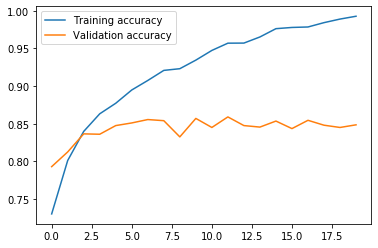

In [193]:
# Plotting training and validation accuracy over epochs
plt.plot(model1.history.history['accuracy'], label='Training accuracy')
plt.plot(model1.history.history['val_accuracy'], label='Validation accuracy')
plt.legend()

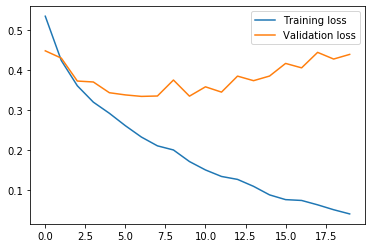

In [194]:
# Plotting training and validation loss over epochs
plt.plot(model1.history.history['loss'], label='Training loss')
plt.plot(model1.history.history['val_loss'], label='Validation loss')
plt.legend()

### Feature Maps from the above initial model:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


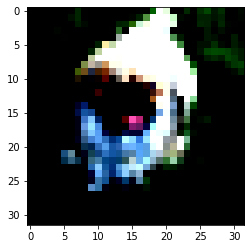

In [170]:
# An example that we'll explore
img_index = 2
example = X_train[img_index]
plt.imshow(example)

In [171]:
# Create list of layer outputs
layer_outputs = [layer.output for layer in model1.layers] 

# Create a model that will return the outputs at each layer
layers_model = keras.Model(inputs=model1.input, outputs=layer_outputs) 

# Get predictions for each layer of the network
outputs = layers_model.predict(example.reshape(1,32,32,3)) 
conv_output = outputs[0]
pooling_output = outputs[1]

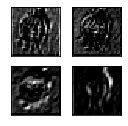

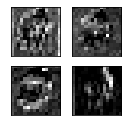

In [172]:
# 4 feature maps 
def PlotFeatureMaps(output_predictions):
    n_col = 2
    n_row = 2 
    plt.figure(figsize=(n_col, n_row))
    for j in range(n_row * n_col):
        plt.subplot(n_row, n_col, j + 1)
        plt.imshow(output_predictions[0, :, :, j])
        plt.xticks(())
        plt.yticks(())
    plt.show
    return None

PlotFeatureMaps(conv_output)
PlotFeatureMaps(pooling_output)

### Optimized convolutional neural network model:
Now we will do the optimized CNN 

In [281]:
# Model optimization

# Creating a CNN VGGNET model.

weight_decay = 5e-4
leakyrelu = LeakyReLU(0.001)
model = Sequential()

# Adding 2 conv layers with 16 filters with a relu function and using batch normalization to standerize the weights in each layer for faster training. 
model.add(Conv2D(32, (3,3), padding='same', activation = leakyrelu, kernel_regularizer=keras.regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3,3), padding='same', activation = leakyrelu, kernel_regularizer=keras.regularizers.l2(weight_decay)))
# Adding a pooling layer to reduce layer output maps sizes.
model.add(MaxPooling2D(pool_size=(3,3)))
# Adding a dropout layer
model.add(Dropout(0.5))
 
model.add(Conv2D(64, (3,3), padding='same', activation = leakyrelu, kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(Conv2D(64, (3,3), padding='same', activation = leakyrelu, kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', activation = leakyrelu, kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(Conv2D(128, (3,3), padding='same', activation = leakyrelu, kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))
 
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.summary()
 


Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_151 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 3, 3, 64)        

C:\Users\cl1888\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [282]:
# Training

# Compiling model using binary crossentropy as the loss function, adam as the training optimizer and accuracy as the metric. 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the model to the validation data with 125 epochs and a batch size of 128. 
model.fit(X_train, y_train, epochs=15, batch_size=50, validation_data=(X_valid, y_valid))

Train on 8000 samples, validate on 2000 samples
Epoch 1/15
8000/8000 [==============================] - 26s 3ms/step - loss: 0.6923 - accuracy: 0.6716 - val_loss: 0.5640 - val_accuracy: 0.7760
Epoch 2/15
8000/8000 [==============================] - 27s 3ms/step - loss: 0.5417 - accuracy: 0.7691 - val_loss: 0.5137 - val_accuracy: 0.7835
Epoch 3/15
8000/8000 [==============================] - 27s 3ms/step - loss: 0.4876 - accuracy: 0.7937 - val_loss: 0.4440 - val_accuracy: 0.8300
Epoch 4/15
8000/8000 [==============================] - 27s 3ms/step - loss: 0.4327 - accuracy: 0.8329 - val_loss: 0.3898 - val_accuracy: 0.8530
Epoch 5/15
8000/8000 [==============================] - 27s 3ms/step - loss: 0.4211 - accuracy: 0.8381 - val_loss: 0.3917 - val_accuracy: 0.8515
Epoch 6/15
8000/8000 [==============================] - 27s 3ms/step - loss: 0.3875 - accuracy: 0.8547 - val_loss: 0.3681 - val_accuracy: 0.8650
Epoch 7/15
8000/8000 [==============================] - 27s 3ms/step - loss: 0.361

In [285]:
# Evaluating (accuracy) model against test data and labels.
model.evaluate(X_test, y_test, verbose=2)

[0.2948976002931595, 0.9045000076293945]

### Feature Maps from the above Optimized model:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


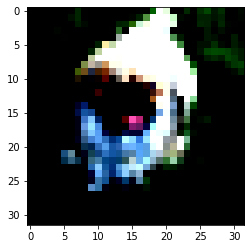

In [264]:
# An example that we'll explore
img_index = 2
example = X_train[img_index]
plt.imshow(example)

In [265]:
# Create list of layer outputs
layer_outputs = [layer.output for layer in model.layers] 

# Create a model that will return the outputs at each layer
layers_model = keras.Model(inputs=model.input, outputs=layer_outputs) 

# Get predictions for each layer of the network
outputs = layers_model.predict(example.reshape(1,32,32,3)) 
conv_output = outputs[0]
pooling_output = outputs[1]

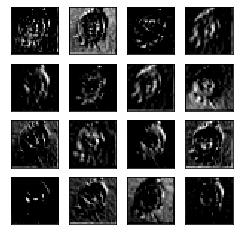

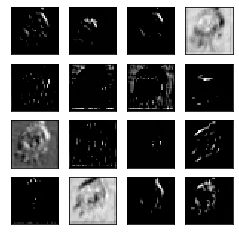

In [266]:
# 16 feature maps 
def PlotFeatureMaps(output_predictions):
    n_col = 4
    n_row = 4 
    plt.figure(figsize=(n_col, n_row))
    for j in range(n_row * n_col):
        plt.subplot(n_row, n_col, j + 1)
        plt.imshow(output_predictions[0, :, :, j])
        plt.xticks(())
        plt.yticks(())
    plt.show
    return None

PlotFeatureMaps(conv_output)
PlotFeatureMaps(pooling_output)

### Plots of accuracy and loss for the training and validation data sets

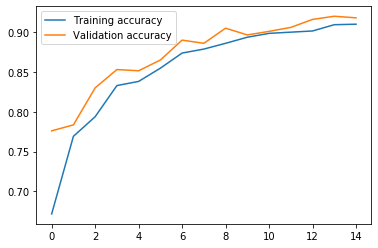

In [283]:
# Plotting training and validation accuracy over epochs
plt.plot(model.history.history['accuracy'], label='Training accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation accuracy')
plt.legend()

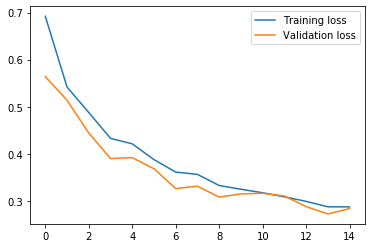

In [284]:
# Plotting training and validation loss over epochs
plt.plot(model.history.history['loss'], label='Training loss')
plt.plot(model.history.history['val_loss'], label='Validation loss')
plt.legend()